# Compare the potential evaporation data for HBV

In this Notebook different sources of forcing data for the HBV model.
    
The compared potential evaporation data:<br>
    - Maastricht KNMI weather station (Netherlands)<br>
    - ERA5 data at the measurement locations ???<br>
    - Mean of ERA5 data per subcatchment

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
from datetime import datetime,timedelta

C:\Users\924259\AppData\Local\Temp\ipykernel_23128\1453402398.py:4: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


## Potential evaporation

In [2]:
folder1 = r"C:\Users\924259\OneDrive - Royal HaskoningDHV\Documents\Master thesis Daan Idsinga\Data\Potential Evaporation and Temperature - ERA5"
folder2 = r"C:\Users\924259\OneDrive - Royal HaskoningDHV\Documents\Master thesis Daan Idsinga\Data\Precipitation - NRR"

### Load KNMI weather station Maastricht data

In [3]:
maastricht = pd.read_csv(f'{folder2}/Maastricht_Evaporation.csv',index_col=[0],parse_dates=[0])
maastricht.index.names = ['time']
maastricht.tz_localize(None)
cal_maastricht = maastricht['2019-01-01':'2020-07-01 00:00:00']
val_maastricht = maastricht['2020-07-01':'2022-04-01 00:00:00']

## Load KNMI weather station Maastricht daily data

In [21]:
maastricht_daily = pd.read_csv(f'{folder2}/Maastricht_daily.csv',index_col=[0],parse_dates=[0])
maastricht_daily.index.names = ['time']
maastricht_daily.tz_localize(None)
cal_maastricht_daily = maastricht_daily['2019-01-01':'2020-07-01 00:00:00']
val_maastricht_daily = maastricht_daily['2020-07-01':'2022-04-01 00:00:00']

### Load subcatchment mean data

In [4]:
cal_mean = pd.read_csv(f'{folder2}/Subcatchments/calibration_potentialevaporation_mean.csv',index_col=[0],parse_dates=[0])
val_mean = pd.read_csv(f'{folder2}/Subcatchments/validation_potentialevaporation_mean.csv',index_col=[0],parse_dates=[0])

### Measurement locations

In [5]:
Meerssen = [5.725796,50.89121]
Hommerich = [5.913613,50.80709]
Eyserbeek = [5.929379,50.82533]
Selzerbeek = [5.921602,50.81058]
Gulp = [5.891506,50.81409]
Sippenaeken = [5.940761,50.75047]

Maastricht = [5.704189,50.87177]

### Load radar data

In [6]:
cal_radar = xr.open_dataset(f'{folder1}/data_calibration_org.nc')
val_radar = xr.open_dataset(f'{folder1}/data_validation_org.nc')

### Get potential evaporation at measurement locations

In [7]:
cal_meas_loc = pd.DataFrame()
cal_meas_loc['Meerssen'] = cal_radar.potential_evaporation.sel(x=Meerssen[0],y=Meerssen[1],method='nearest').values
cal_meas_loc['Hommerich'] = cal_radar.potential_evaporation.sel(x=Hommerich[0],y=Hommerich[1],method='nearest').values
cal_meas_loc['Eyserbeek'] = cal_radar.potential_evaporation.sel(x=Eyserbeek[0],y=Eyserbeek[1],method='nearest').values
cal_meas_loc['Selzerbeek'] = cal_radar.potential_evaporation.sel(x=Selzerbeek[0],y=Selzerbeek[1],method='nearest').values
cal_meas_loc['Gulp'] = cal_radar.potential_evaporation.sel(x=Gulp[0],y=Gulp[1],method='nearest').values
cal_meas_loc['Sippenaeken'] = cal_radar.potential_evaporation.sel(x=Sippenaeken[0],y=Sippenaeken[1],method='nearest').values
cal_meas_loc.index = cal_radar.time

In [8]:
val_meas_loc = pd.DataFrame()
val_meas_loc['Meerssen'] = val_radar.potential_evaporation.sel(x=Meerssen[0],y=Meerssen[1],method='nearest').values
val_meas_loc['Hommerich'] = val_radar.potential_evaporation.sel(x=Hommerich[0],y=Hommerich[1],method='nearest').values
val_meas_loc['Eyserbeek'] = val_radar.potential_evaporation.sel(x=Eyserbeek[0],y=Eyserbeek[1],method='nearest').values
val_meas_loc['Selzerbeek'] = val_radar.potential_evaporation.sel(x=Selzerbeek[0],y=Selzerbeek[1],method='nearest').values
val_meas_loc['Gulp'] = val_radar.potential_evaporation.sel(x=Gulp[0],y=Gulp[1],method='nearest').values
val_meas_loc['Sippenaeken'] = val_radar.potential_evaporation.sel(x=Sippenaeken[0],y=Sippenaeken[1],method='nearest').values
val_meas_loc.index = val_radar.time

### Load Geul shapefile

In [9]:
geul_shape = gpd.read_file(f'{folder2}/Subcatchments/GEU_Qstrgbd.shp')
geul_shape.to_crs('4326',inplace=True)

## Calibration period 

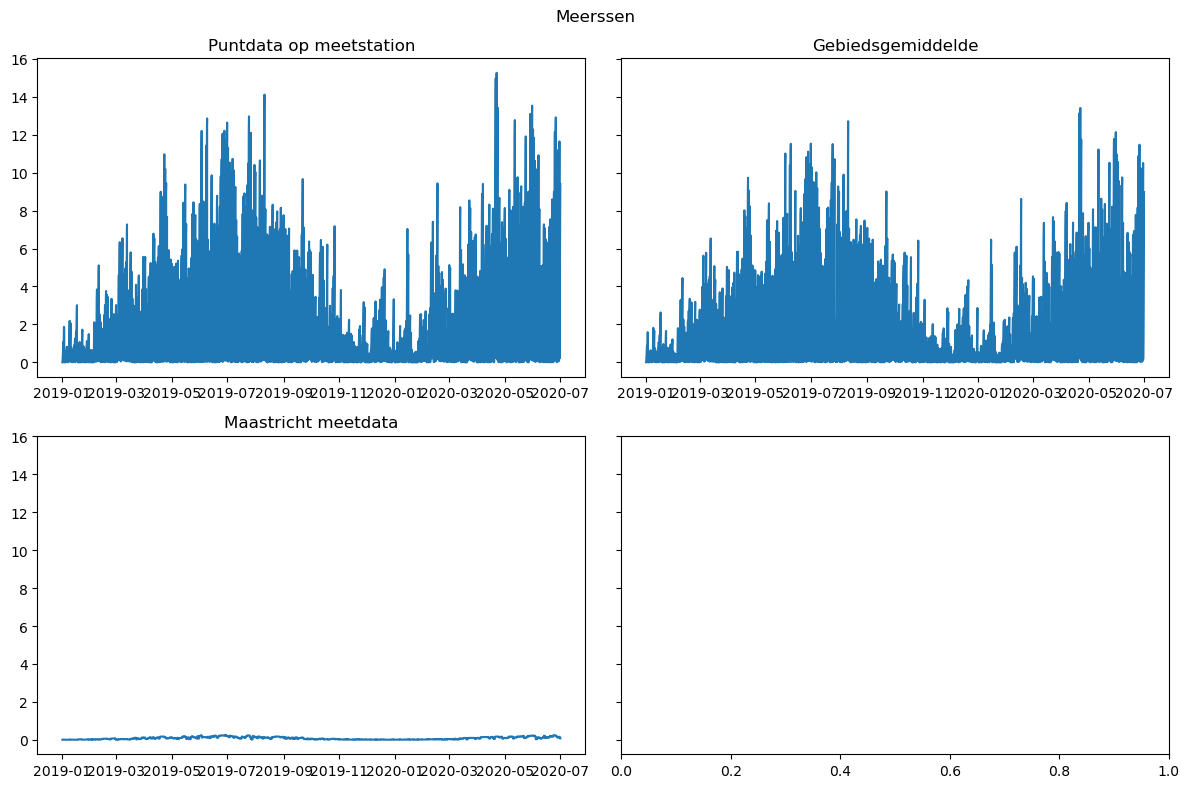

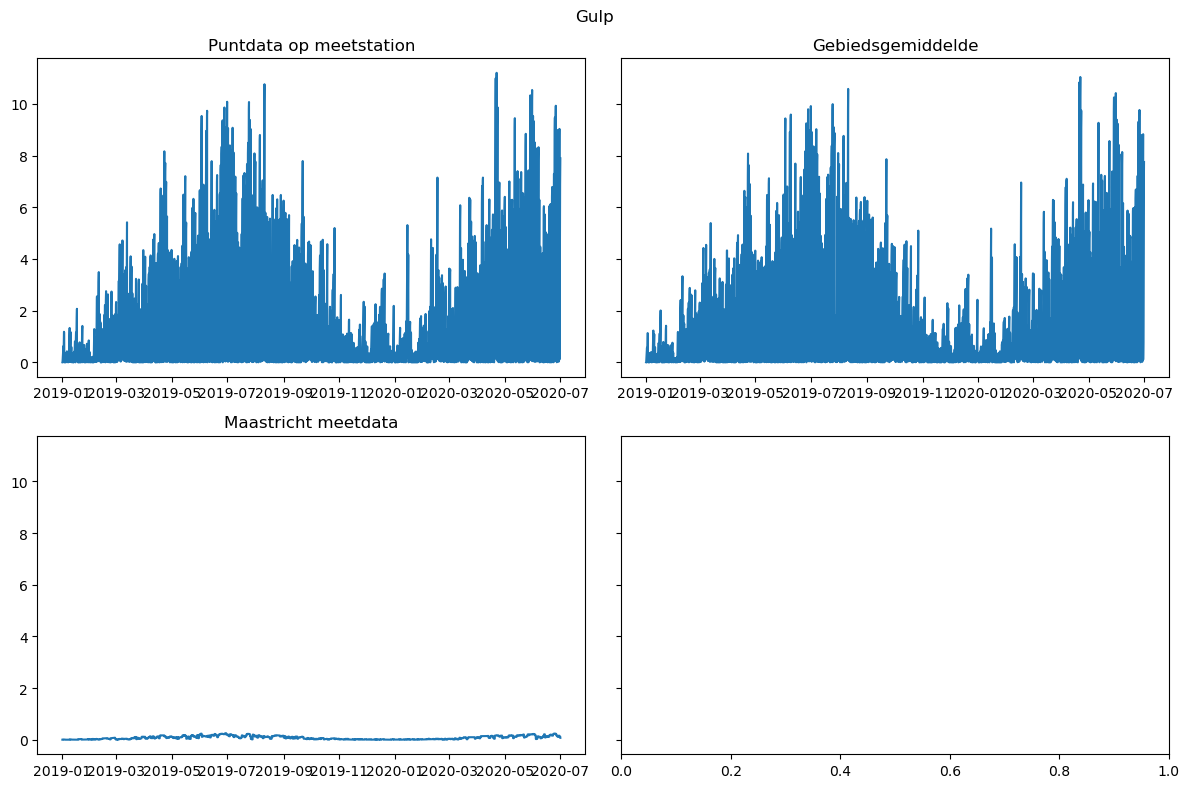

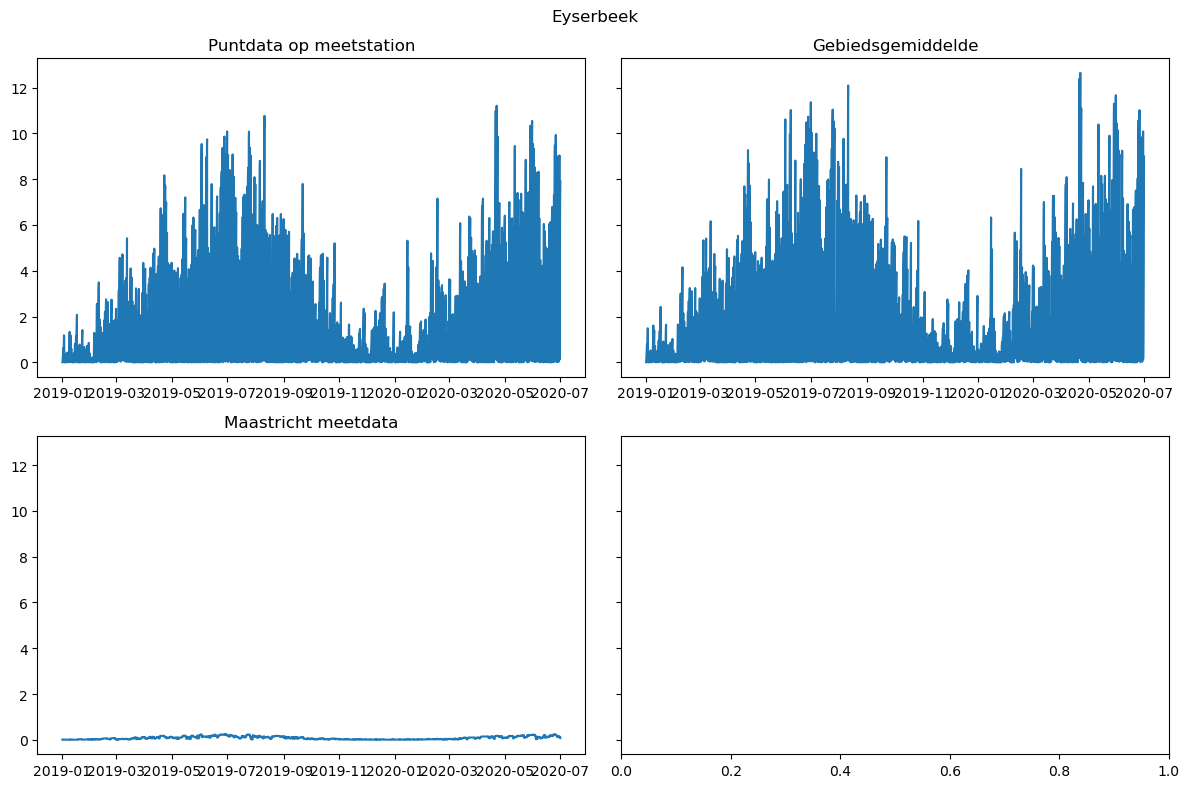

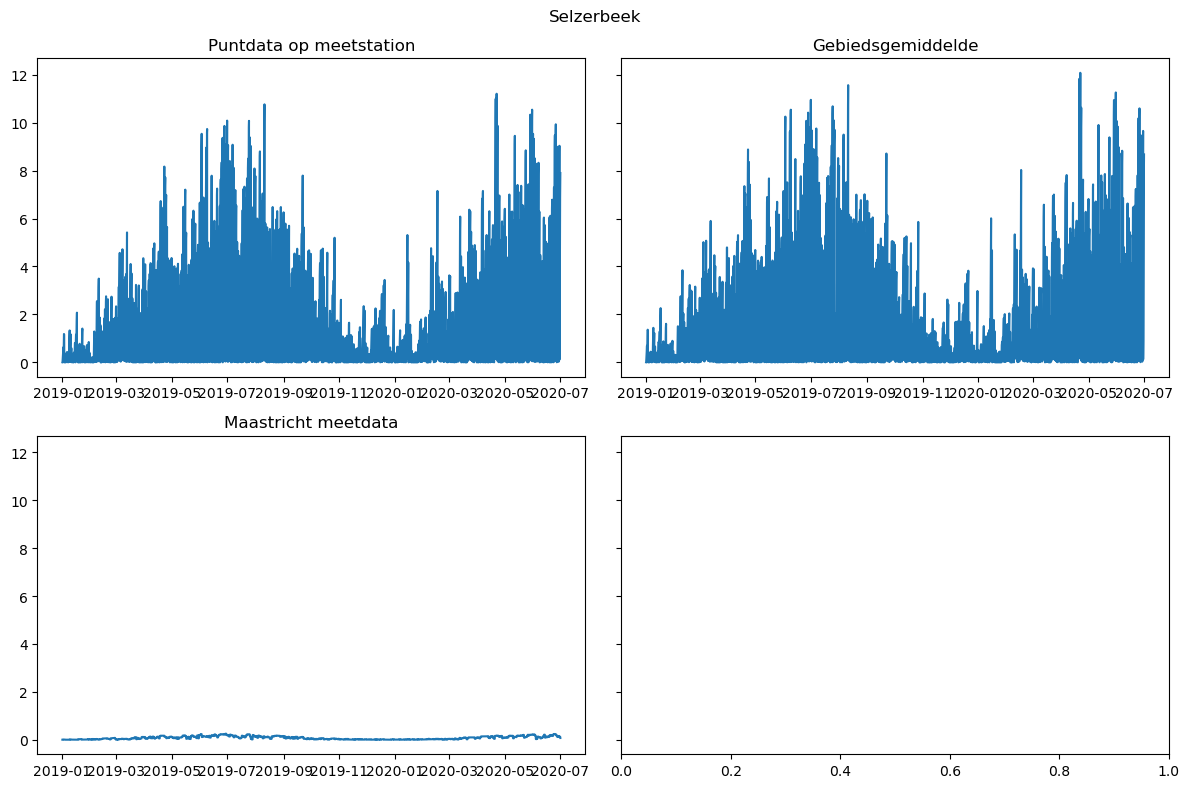

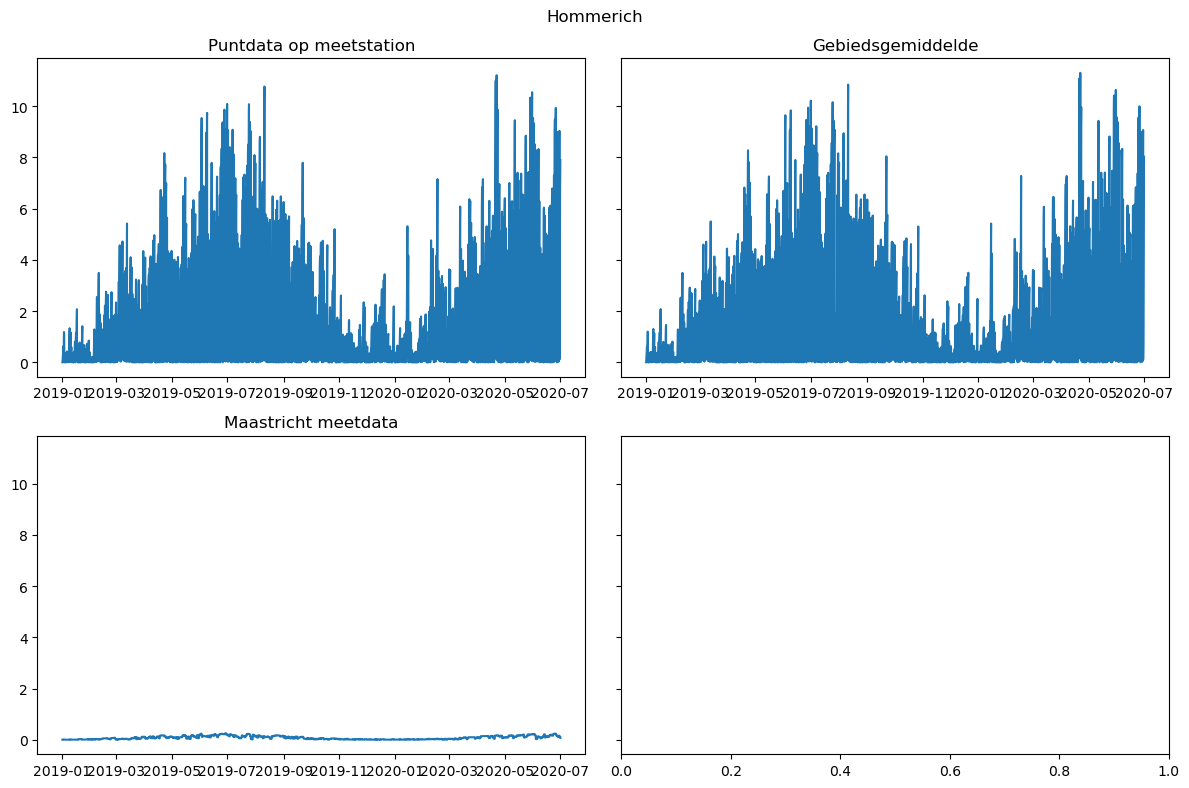

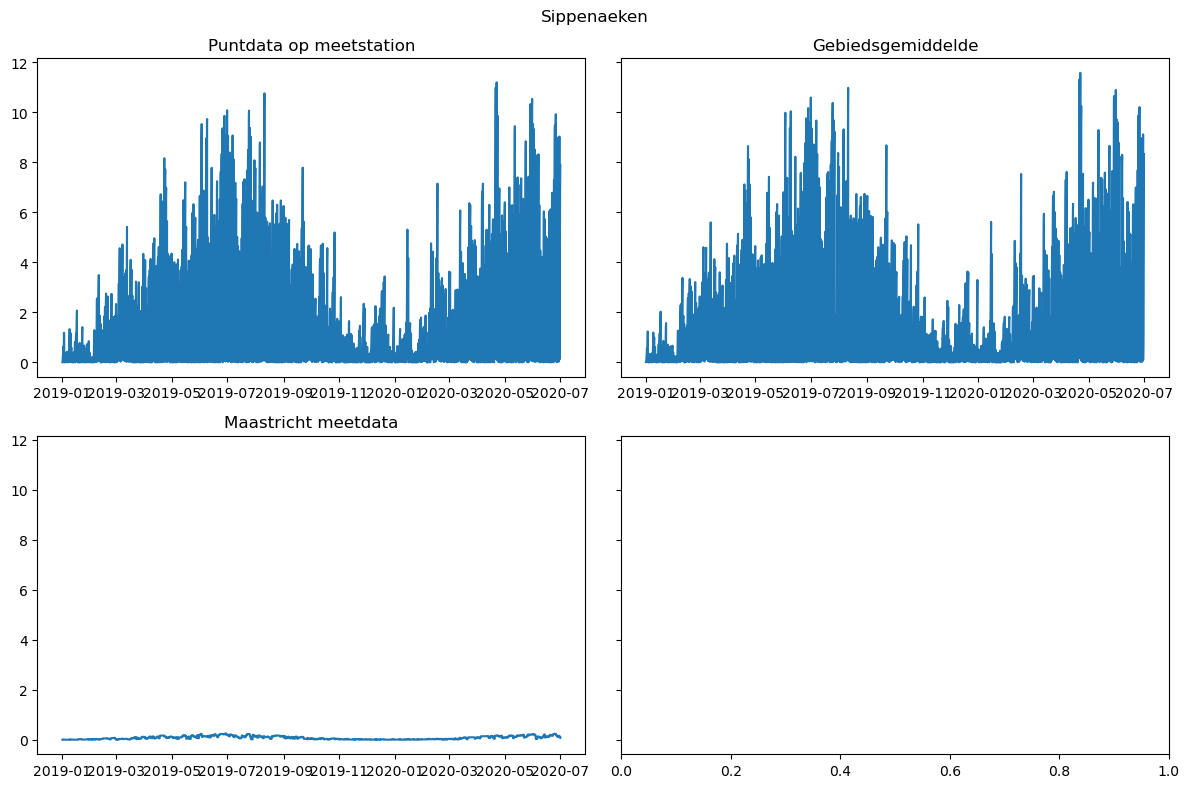

In [10]:
for name in cal_mean.columns:
    fig,ax = plt.subplots(2,2, sharey=True, figsize=(12,8))
    ax[0,0].plot(cal_meas_loc[f'{name}'])
    ax[0,0].set_title('Puntdata op meetstation')
    ax[0,1].plot(cal_mean[f'{name}'])
    ax[0,1].set_title('Gebiedsgemiddelde')
    ax[1,0].plot(cal_maastricht)
    ax[1,0].set_title('Maastricht meetdata')
    plt.suptitle(f'{name}')
    fig.tight_layout()

## Validation period

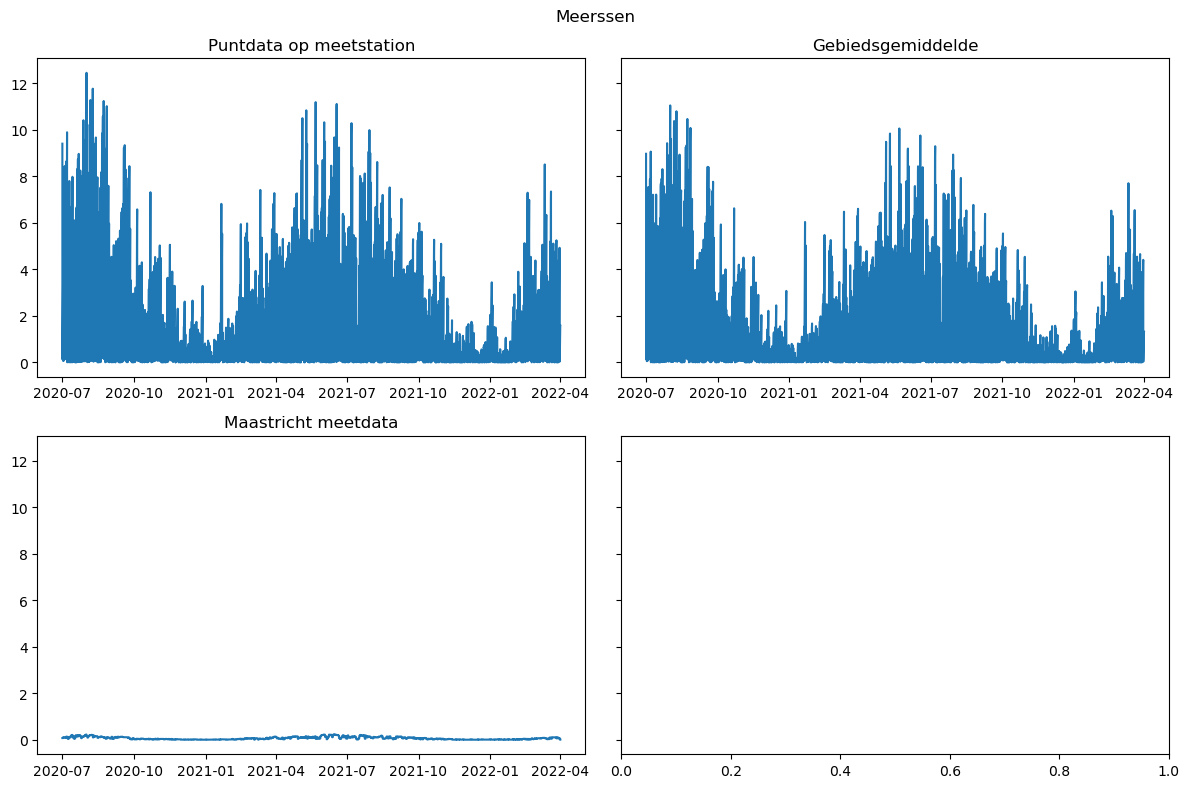

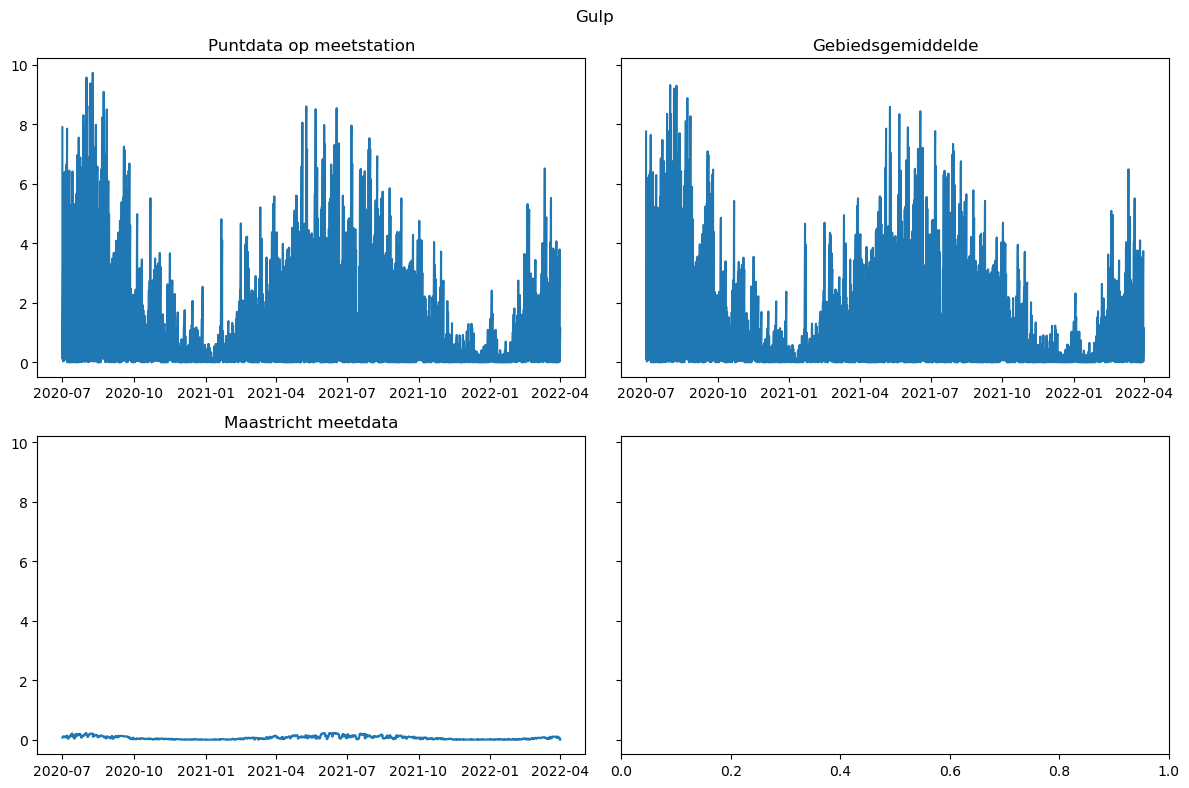

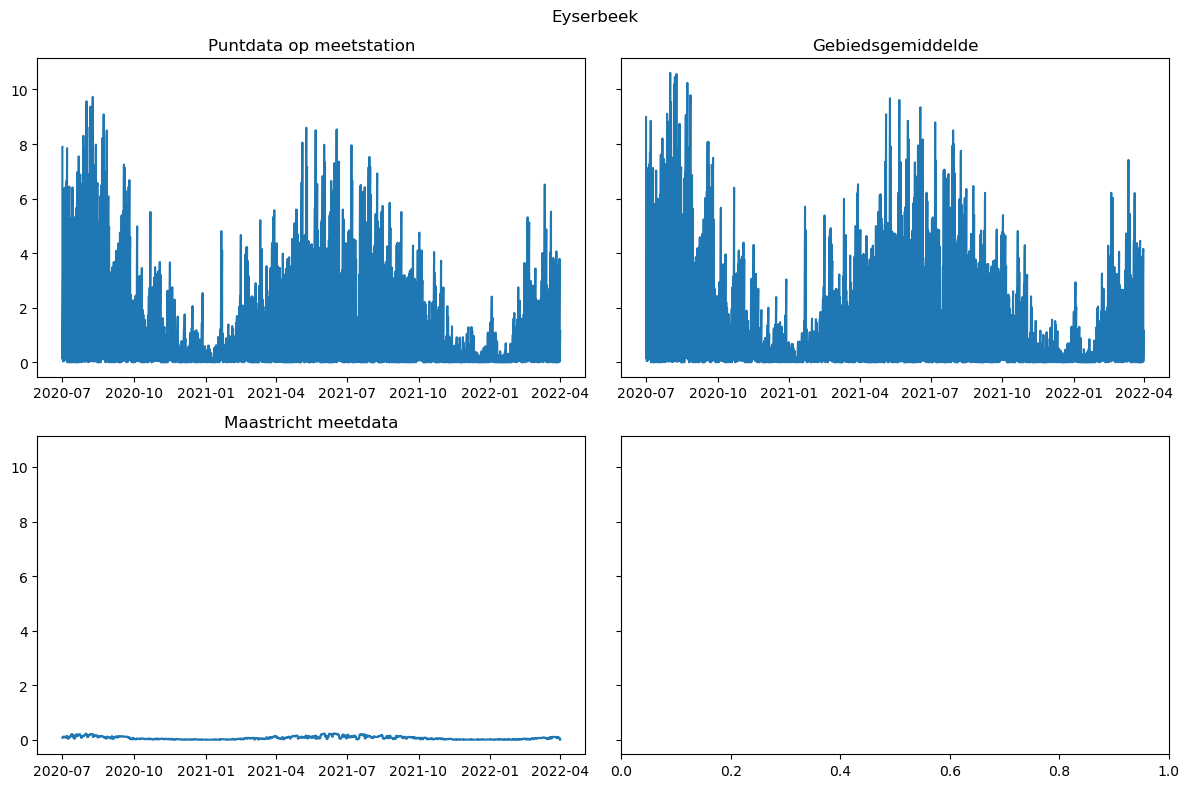

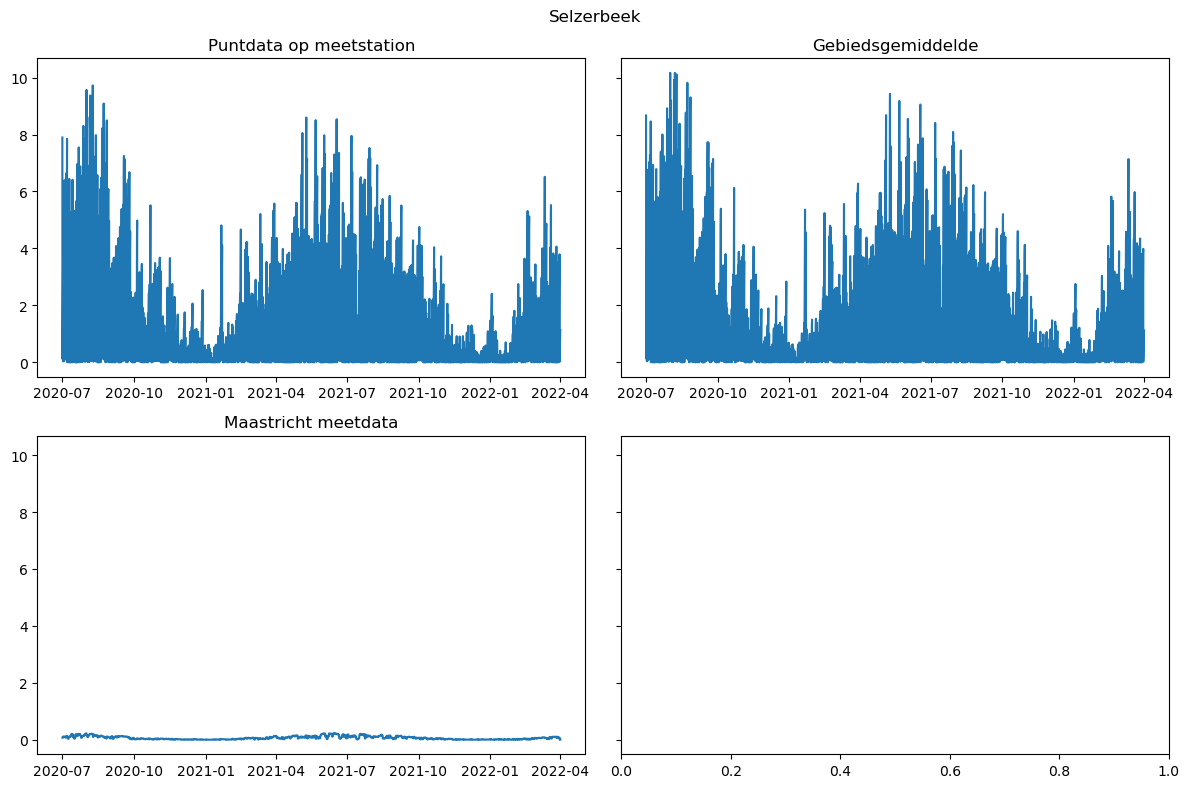

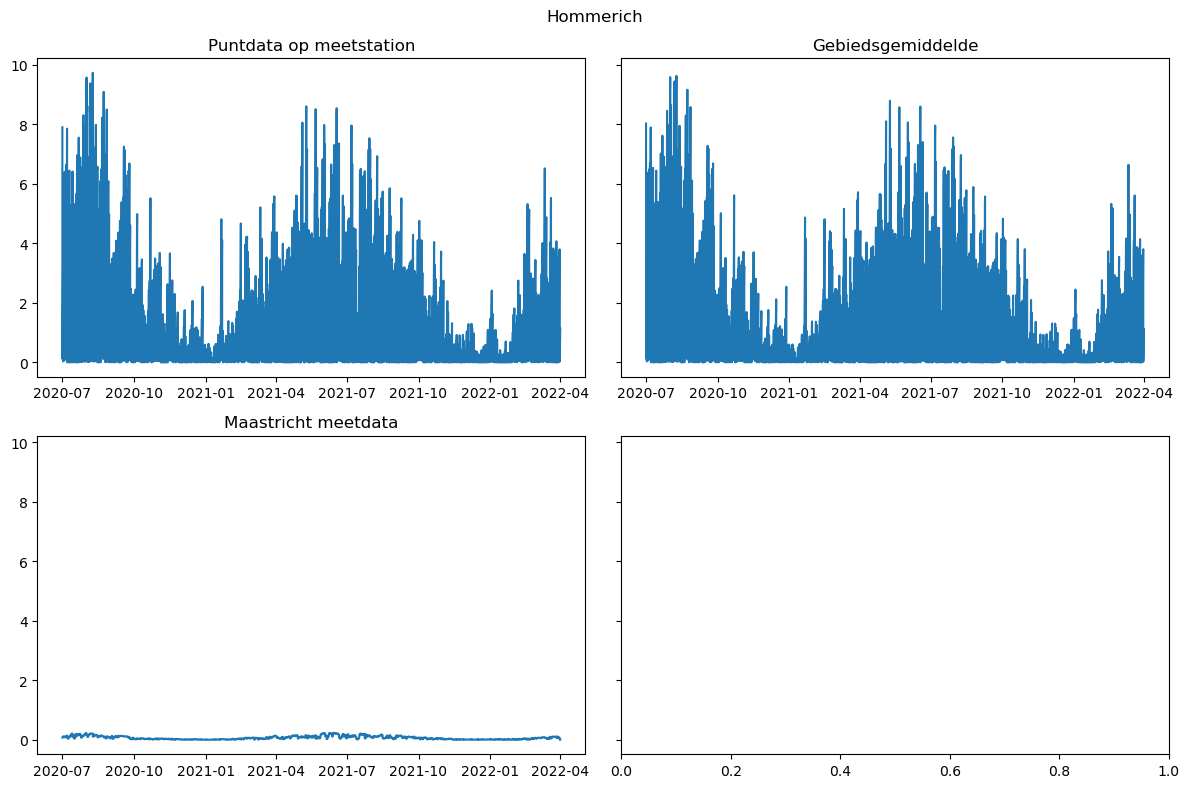

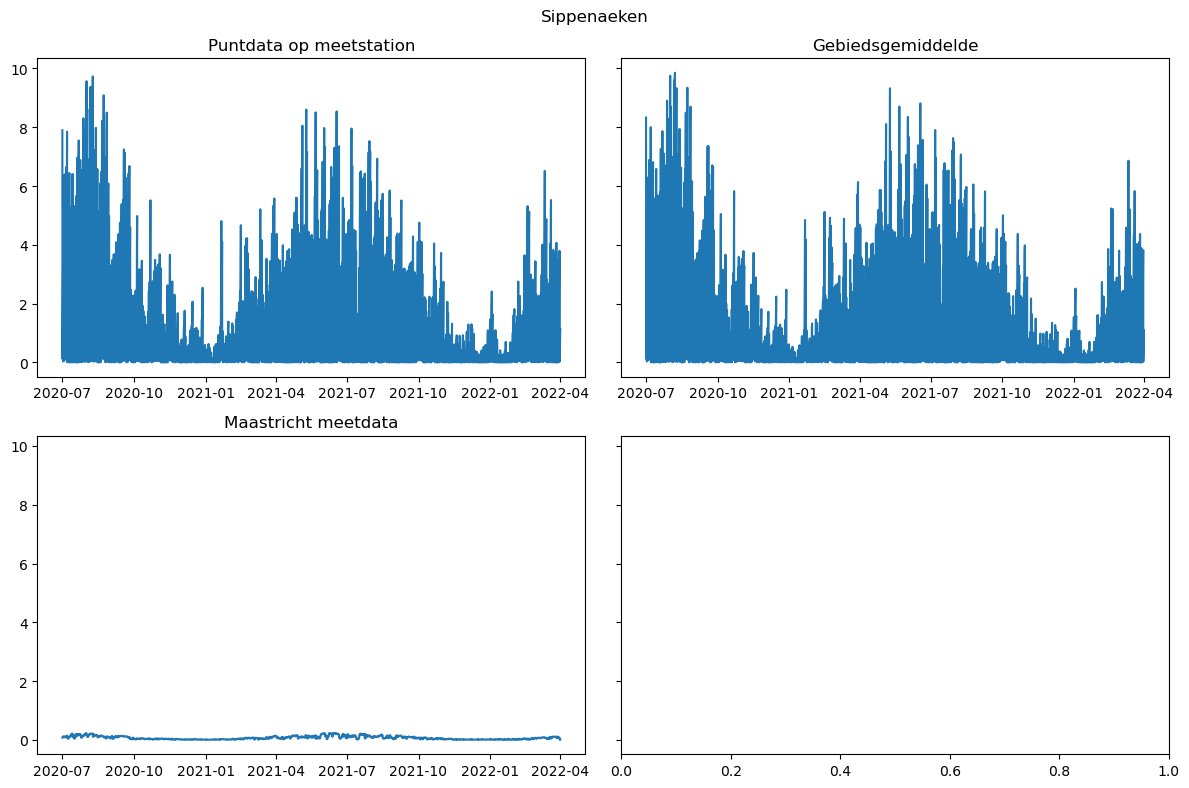

In [11]:
for name in val_mean.columns:
    fig,ax = plt.subplots(2,2, sharey=True, figsize=(12,8))
    ax[0,0].plot(val_meas_loc[f'{name}'])
    ax[0,0].set_title('Puntdata op meetstation')
    ax[0,1].plot(val_mean[f'{name}'])
    ax[0,1].set_title('Gebiedsgemiddelde')
    ax[1,0].plot(val_maastricht)
    ax[1,0].set_title('Maastricht meetdata')
    plt.suptitle(f'{name}')
    fig.tight_layout()

## Plot locations

Locations of the measurement locations and the weather stations

In [12]:
Meerssen = [5.725796,50.89121]
Hommerich = [5.913613,50.80709]
Eyserbeek = [5.929379,50.82533]
Selzerbeek = [5.921602,50.81058]
Gulp = [5.891506,50.81409]
Sippenaeken = [5.940761,50.75047]

Maastricht = [5.704189,50.87177]
Gemmenich = [5.974898,50.74865]

## Check Maastricht maximum

## Calibration period 

In [13]:
print(f'The large peak at the Maastricht weather station during the calibration period of {cal_maastricht.max()} mm occurs on {cal_maastricht.idxmax()}')

The large peak at the Maastricht weather station during the calibration period of EV24    0.254167
dtype: float64 mm occurs on EV24   2019-06-29
dtype: datetime64[ns]


In [14]:
cal_meas_loc.loc[cal_maastricht.idxmax()]

,Meerssen,Hommerich,Eyserbeek,Selzerbeek,Gulp,Sippenaeken
2019-06-29,11.024272,8.775578,8.775578,8.775578,8.775578,8.775578


In [15]:
cal_mean.loc[cal_maastricht.idxmax()]

,Meerssen,Gulp,Eyserbeek,Selzerbeek,Hommerich,Sippenaeken
time,,,,,,
2019-06-29,9.923118,8.686257,9.575991,9.276048,8.832801,9.03534


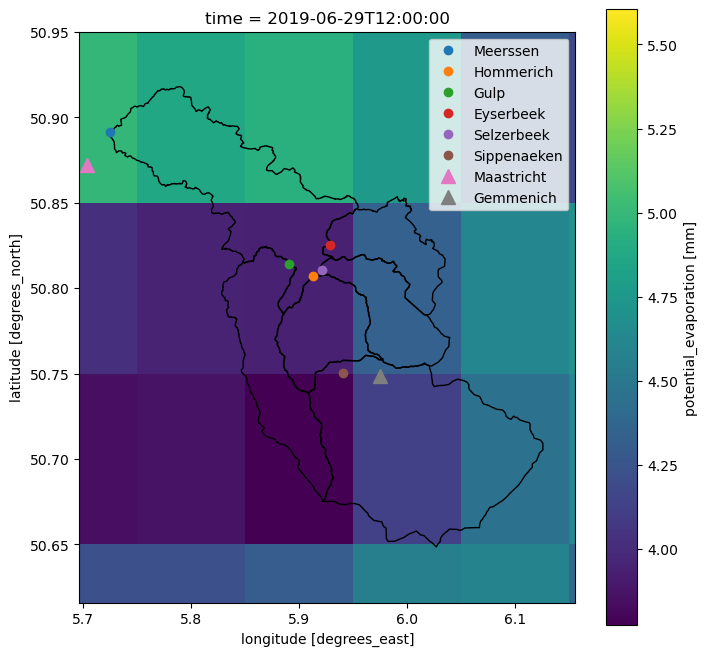

In [16]:
fig, ax = plt.subplots(figsize=(8,8))

cal_radar.potential_evaporation.sel(time='2019-06-29T12:00:00').plot(ax=ax)

plt.plot(Meerssen[0],Meerssen[1],'o',label='Meerssen')
plt.plot(Hommerich[0],Hommerich[1],'o',label='Hommerich')
plt.plot(Gulp[0],Gulp[1],'o',label='Gulp')
plt.plot(Eyserbeek[0],Eyserbeek[1],'o',label='Eyserbeek')
plt.plot(Selzerbeek[0],Selzerbeek[1],'o',label='Selzerbeek')
plt.plot(Sippenaeken[0],Sippenaeken[1],'o',label='Sippenaeken')

plt.plot(Maastricht[0],Maastricht[1],'^',label='Maastricht',ms=10)
plt.plot(Gemmenich[0],Gemmenich[1],'^',label='Gemmenich',ms=10)

geul_shape.plot(ax=ax, edgecolor='black', color='none')
plt.xlim(5.697,6.156)
plt.ylim(50.616,50.95)
plt.legend(loc='best');

## Validation period

In [17]:
print(f'The large peak at the Maastricht weather station during the validation period of {val_maastricht.max()} mm occurs on {val_maastricht.idxmax()}')

The large peak at the Maastricht weather station during the validation period of EV24    0.233333
dtype: float64 mm occurs on EV24   2021-06-14
dtype: datetime64[ns]


In [18]:
val_meas_loc.loc[val_maastricht.idxmax()]

,Meerssen,Hommerich,Eyserbeek,Selzerbeek,Gulp,Sippenaeken
2021-06-14,7.962839,6.303025,6.303025,6.303025,6.303025,6.303025


In [19]:
val_mean.loc[val_maastricht.idxmax()]

,Meerssen,Gulp,Eyserbeek,Selzerbeek,Hommerich,Sippenaeken
time,,,,,,
2021-06-14,7.075741,6.286957,6.820667,6.646317,6.358853,6.57284


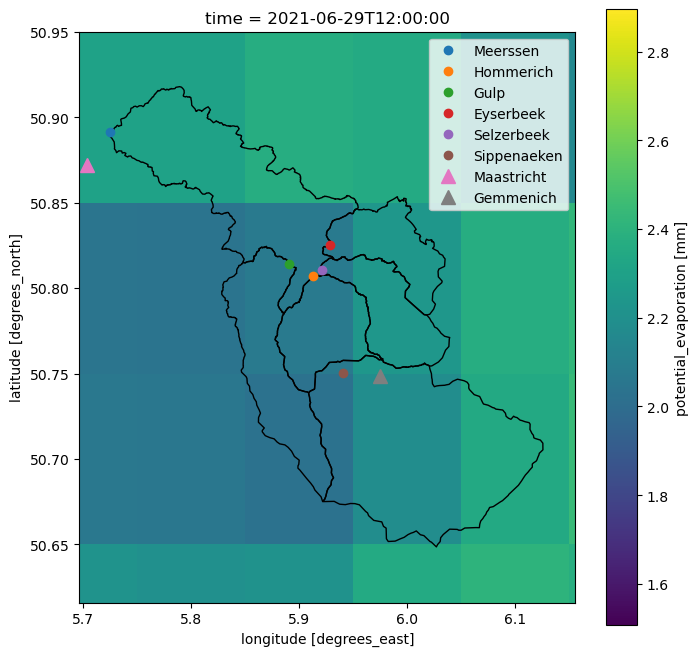

In [20]:
fig, ax = plt.subplots(figsize=(8,8))

val_radar.potential_evaporation.sel(time='2021-06-29T12:00:00').plot(ax=ax)

plt.plot(Meerssen[0],Meerssen[1],'o',label='Meerssen')
plt.plot(Hommerich[0],Hommerich[1],'o',label='Hommerich')
plt.plot(Gulp[0],Gulp[1],'o',label='Gulp')
plt.plot(Eyserbeek[0],Eyserbeek[1],'o',label='Eyserbeek')
plt.plot(Selzerbeek[0],Selzerbeek[1],'o',label='Selzerbeek')
plt.plot(Sippenaeken[0],Sippenaeken[1],'o',label='Sippenaeken')

plt.plot(Maastricht[0],Maastricht[1],'^',label='Maastricht',ms=10)
plt.plot(Gemmenich[0],Gemmenich[1],'^',label='Gemmenich',ms=10)

geul_shape.plot(ax=ax, edgecolor='black', color='none')
plt.xlim(5.697,6.156)
plt.ylim(50.616,50.95)
plt.legend(loc='best');

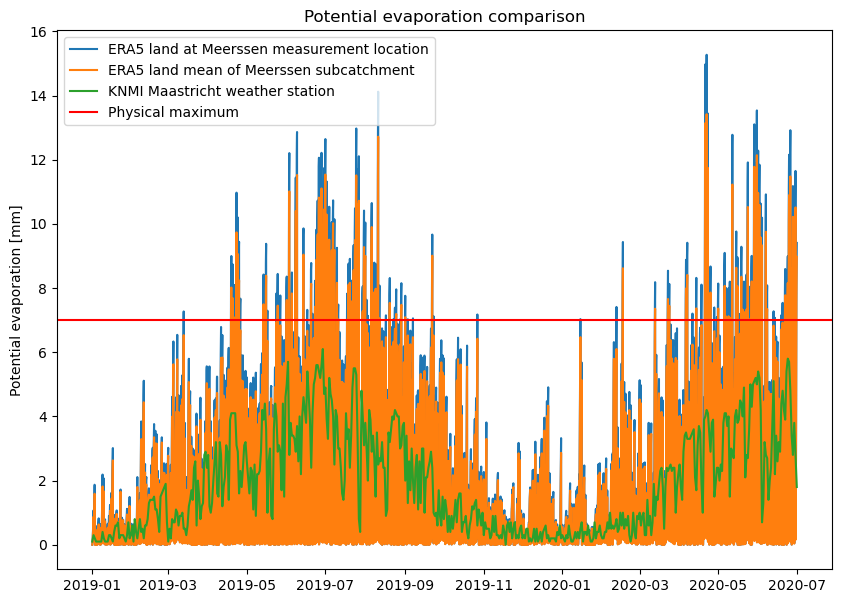

In [52]:
plt.figure(figsize=(10,7))
plt.plot(cal_meas_loc['Meerssen'],label='ERA5 land at Meerssen measurement location')
plt.plot(cal_mean['Meerssen'],label='ERA5 land mean of Meerssen subcatchment')
plt.plot(cal_maastricht_daily,label='KNMI Maastricht weather station')
plt.axhline(7,color='red',label='Physical maximum')
plt.legend(loc='best')
plt.ylabel('Potential evaporation [mm]')
plt.title('Potential evaporation comparison')
plt.savefig('pot_evap_comparison.png',bbox_inches='tight');

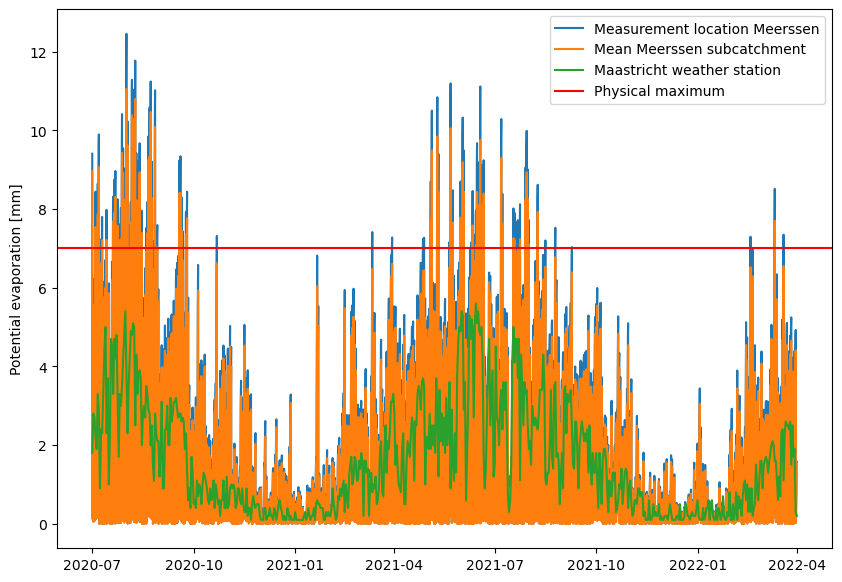

In [46]:
plt.figure(figsize=(10,7))
plt.plot(val_meas_loc['Meerssen'],label='Measurement location Meerssen')
plt.plot(val_mean['Meerssen'],label='Mean Meerssen subcatchment')
plt.plot(val_maastricht_daily,label='Maastricht weather station')
plt.axhline(7,color='red',label='Physical maximum')
plt.legend(loc='best')
plt.ylabel('Potential evaporation [mm]');